**Simple Linear Regression**

- Problem Statement : Based on CGPA we have to predict Salary Package

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, explained_variance_score

**Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSA+ML+DL/Machine Learning/Linear Regression/placement.csv')
data.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Here we will not use any csv file, we will create our own dataset

In [ ]:
# Data Preparation
# CGPA column (As GPA in range 1 to 10)
x_col = np.random.uniform(low=1.0, high=10.0, size=(10000,))
x_col = np.round(x_col, 2)

# Package Column (As Package can be anything from 10 LPA to 50 LPA)
y_col = np.random.uniform(low=1.0, high=10.0, size=(10000,))
y_col = np.round(y_col, 2)

In [ ]:
# Now convert it into Pandas DataFrame

df = pd.DataFrame({'CGPA':x_col, 'Package': y_col})
df.head(5)

,CGPA,Package
0,1.24,7.19
1,8.26,9.10
2,3.17,4.83
3,5.17,3.79
4,2.37,6.66


**Split Dataset into Training and Testing**

In [ ]:
# Now we have to extract X and Y column to create a data_set split
# CSV dataset
# X = data.iloc[:, :1].values
# y = data.iloc[:, 1:].values

# Our dataset
X = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

# Then create a dataset for training (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

[[1.24]
 [8.26]
 [3.17]
 ...
 [7.57]
 [9.45]
 [4.05]]
[[7.19]
 [9.1 ]
 [4.83]
 ...
 [2.31]
 [4.85]
 [6.17]]


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1), (2000, 1), (8000, 1), (2000, 1))

**Feature Scaling (Only if necessary)**

In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

**Training the model**

In [ ]:
# Training the model

lr = LinearRegression()
# lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
lr.fit(X_train, y_train)

LinearRegression()

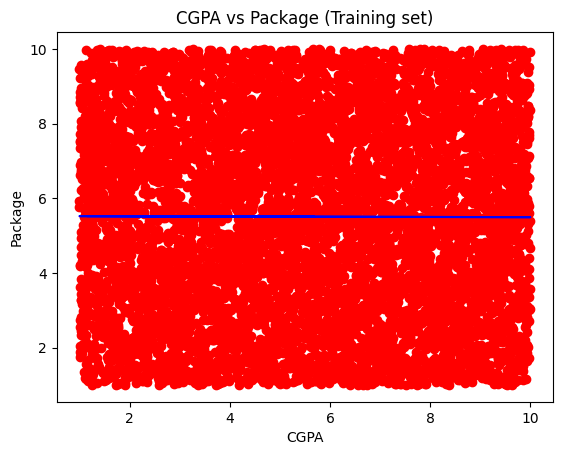

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('CGPA vs Package (Training set)')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

**Testing**

In [ ]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
# print(y_pred)

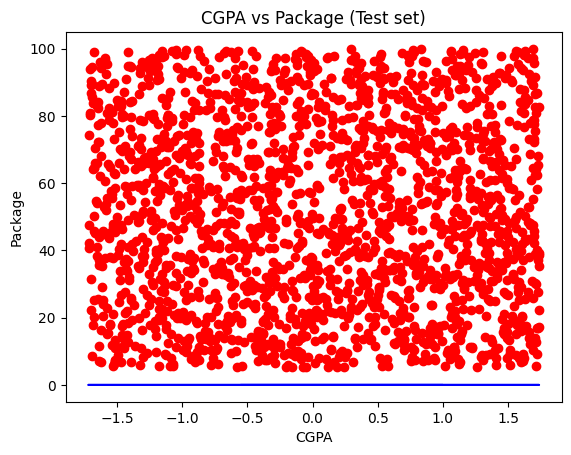

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('CGPA vs Package (Test set)')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

**Calculate Accuracy**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("Explained Variance Score", evs)
print("R2 Score", r2)

Mean Squared Error 58.899364023471854
Mean Absolute Error 7.551037080079334
Explained Variance Score 0.003449112968796908
R2 Score -30.201423905053357


**Verifying the result on test data point**

In [ ]:
# Intercept and Coefficient
m = lr.coef_
c = lr.intercept_
print(m, c)

[[-0.04463918]] [-7.25371654e-16]


In [ ]:
# Top 5 x_test and y_test
print(X_test[:5])
print(y_test[:5])

[[-0.15786735]
 [ 0.2359724 ]
 [ 0.59861692]
 [ 0.86377636]
 [ 1.51107733]]
[[5.66]
 [6.79]
 [8.24]
 [6.86]
 [9.81]]


In [ ]:
# Predictions

# Check the actiula values of 3rd data point form our test set
point_x = X_test[3]
point_y = y_test[3]
print("Actual value and prediction on this 3rd data point is: ", point_x, point_y)

# Prediction on the same data point by calculation (y = mx + c)
prediction = m * X_test[3] + c
prediction = np.round(prediction, 2)
print("Predicted package by our model : ", prediction)

Actual value and prediction on this 3rd data point is:  [0.86377636] [6.86]
Predicted package by our model :  [[-0.04]]
